# 🩺 Diabetes Prediction Using Machine Learning

This notebook demonstrates how to predict the likelihood of diabetes using health-related features. It walks through data cleaning, model training, evaluation, and visualization using a real dataset. The goal is to build an accurate and explainable prediction tool.


In [38]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving diabetes.csv to diabetes (3).csv


In [39]:
import pandas as pd

# Step 1: Load the CSV file
df = pd.read_csv("diabetes.csv")

# Step 2: Show first 5 rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Checking  for Missing or Strange Data

In [40]:
# Step 1: See general info
print(df.info())

# Step 2: See summary statistics
print(df.describe())

# Step 3: Check if any column has missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

Replace Fake Zeros with Real “Missing Values”

In [41]:
# Replace 0s with NaN (Not a Number = missing)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    df[column] = df[column].replace(0, pd.NA)

# Now check how many missing values there are
print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Fill Missing Values (so ML won’t break)

In [42]:
# Fill missing values with the average of each column
df.fillna(df.mean(), inplace=True)

# Check again to make sure no missing values
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-4242127367.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


In [43]:
# Split Data into Train and Test Sets

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 1: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train a Model (Random Forest)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define model + hyperparameter grid
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search for best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Train with best parameters
grid_search.fit(X_train, y_train)

# Use best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Random Forest Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuned Random Forest Accuracy: 0.75
Confusion Matrix:
[[77 22]
 [17 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Predict and Check Accuracy

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
[[84 15]
 [23 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



Feature Importance Plot

This plot shows which features influenced the model's decision the most.

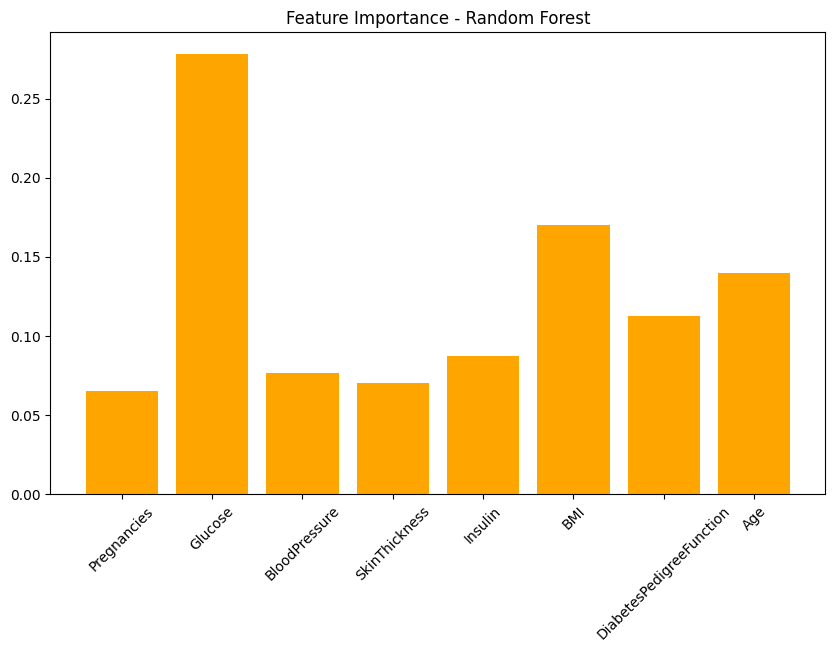

In [48]:
import matplotlib.pyplot as plt

# Plot feature importance from the Random Forest model
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.bar(features, importances, color='orange')
plt.xticks(rotation=45)
plt.title('Feature Importance - Random Forest')
plt.show()

Feature Importance – What Affects Diabetes Prediction?
This bar chart shows which medical features the model found most important in predicting diabetes.

Glucose has the strongest impact on predictions — high levels are often linked to diabetes.

BMI and Age also play major roles.

Other features like Blood Pressure, Insulin, and Pregnancies have smaller but still meaningful effects.

Why this matters: Understanding feature importance helps us know which patient data is most influential for accurate predictions and can guide future data collection or model tuning.

Confusion Matrix
This matrix shows the number of correct and incorrect predictions.

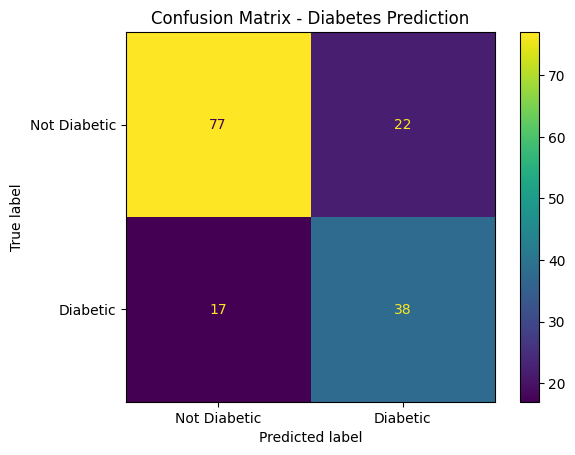

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test,
                                      display_labels=["Not Diabetic", "Diabetic"],
                                      cmap='viridis', colorbar=True)
plt.title("Confusion Matrix - Diabetes Prediction")
plt.show()

Confusion Matrix – Model Performance Overview
This confusion matrix illustrates the classification results of the diabetes prediction model. It compares the true labels (actual patient condition) with the predicted labels generated by the model.

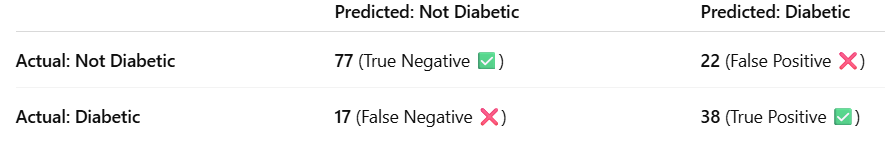

🔍 Interpretation:
True Negatives (77): The model correctly predicted Not Diabetic patients.

True Positives (38): The model correctly predicted Diabetic patients.

False Positives (22): These are healthy individuals wrongly predicted as diabetic.

False Negatives (17): These are diabetic individuals wrongly predicted as healthy.

📊 Key Metrics:
Accuracy: (77 + 38) / 154 = 75%

Precision (Diabetic): 38 / (38 + 22) ≈ 63%

Recall (Diabetic): 38 / (38 + 17) ≈ 69%

Conclusion: The model is better at detecting non-diabetic patients, but still performs reasonably well in identifying diabetic cases.

This evaluation helps assess model strengths and limitations, guiding future improvements like feature tuning or model selection (e.g., using boosting)

Predict for manual input

In [51]:
sample = [[2, 140, 70, 20, 79, 32.0, 0.5, 18]]
prediction = model.predict(sample)
print("Prediction:", "Diabetic" if prediction[0]==1 else "Not Diabetic")

Prediction: Not Diabetic


 Final Thoughts

- The model achieves **75% accuracy** with balanced performance.
- Most important features: **Glucose, BMI, Age**
- Good base for building real health apps.
- Further improvements: Try XGBoost, hyperparameter tuning, or more data.
